In [4]:
###############################################################################
# Admin work; creating a normalized path to work on any OS for calls to keys or files
###############################################################################
import Geohash
import os
path = os.path.normpath(os.path.join(os.path.normpath(os.path.expanduser("~")),"projects","LC3-Creations"))

#**********************************************************************
# This block of imports eliminates an ipython error associated with
# 'import sys' where the print statement goes to the console
# and not the ipython notebook.  For more information on this workaround,
# see https://github.com/ipython/ipython/issues/8354
#**********************************************************************


In [15]:
#**********************************************************************
# Class to load json stored in .txt files from disc into python json/dicts for analysis
#**********************************************************************

import json
import re
import os

#shameless copy paste from json/decoder.py
FLAGS = re.VERBOSE | re.MULTILINE | re.DOTALL
WHITESPACE = re.compile(r'[ \t\n\r]*', FLAGS)

class ConcatJSONDecoder(json.JSONDecoder):
    def decode(self, s, _w=WHITESPACE.match):
        s_len = len(s)

        objs = []
        end = 0
        while end != s_len:
            obj, end = self.raw_decode(s, idx=_w(s, end).end())
            end = _w(s, end).end()
            objs.append(obj)
        return objs

In [6]:
#**********************************************************************
# How to load your obfuscated keys from a local ".txt" file
# The text file is from the json file you stored above
#**********************************************************************

# I created a nested dictionary with my API keys, then wrote that json to disk.  Now, I load the json and just pass the keys into the application

oauth = json.load(open(os.path.join(path,"apikeys.txt")), cls=ConcatJSONDecoder)

In [7]:
#**********************************************************************
# Passing in oauth values; you obviscate by loading your locally stored json
#**********************************************************************

# Import the necessary package to process data in JSON format
try:
    import json
except ImportError:
    import simplejson as json

# Import the necessary methods from "twitter" library
from twitter import Twitter, OAuth, TwitterHTTPError, TwitterStream

# Variables that contains the user credentials to access Twitter API 
# If you have not followed the obfuscate process above, this will be empty and error out
ACCESS_TOKEN = oauth[0]['twitter']['accesstoken']
ACCESS_SECRET = oauth[0]['twitter']['accesssecret']
CONSUMER_KEY = oauth[0]['twitter']['consumerkey']
CONSUMER_SECRET = oauth[0]['twitter']['consumersecret']

oauth = OAuth(ACCESS_TOKEN, ACCESS_SECRET, CONSUMER_KEY, CONSUMER_SECRET)


In [10]:
# Initiate the connection to Twitter Streaming API
twitter_stream = TwitterStream(auth=oauth)

In [ ]:
# Filter the public data following through Twitter; the format is "long,lat , long,lat" with southwest corner first
iterator = twitter_stream.statuses.filter(locations = '-77.276, 38.759, -76.830,38.999')

# Print each tweet in the stream to the screen 
# Here we set it to stop after getting 1000 tweets. 
# You don't have to set it to stop, but can continue running 
# the Twitter API to collect data for days or even longer. 

with open('./washingtondc.txt', 'w+') as outfile:
    for tweet in iterator:
        try:
            if tweet['user']['geo_enabled']==True and tweet['coordinates'] != None:
                json.dump(tweet, outfile)
        except:
            pass
            
        
        # Twitter Python Tool wraps the data returned by Twitter 
        # as a TwitterDictResponse object.
        # We convert it back to the JSON format to print/score
        #print json.dumps(tweet)  

        # The command below will do pretty printing for JSON data, try it out
        # print json.dumps(tweet, indent=4)
        
    outfile.closed  

In [43]:
test = json.load(open('washingtondc.txt'),cls=ConcatJSONDecoder)

In [89]:
place = {}
for l in test:
    if l['user']['id'] in place.keys():
        pass
    else:
        place[l['user']['id']]={}
        place[l['user']['id']]['screenName']=l['user']['screen_name']
        place[l['user']['id']]['long']=l['coordinates']['coordinates'][0]
        place[l['user']['id']]['lat']=l['coordinates']['coordinates'][1]
        place[l['user']['id']]['lang'] = l['lang']
        place[l['user']['id']]['date'] = l['created_at']


In [90]:
import pandas as pd
df = pd.DataFrame.from_dict(place,orient='index')

In [91]:
import seaborn

In [94]:
df

,date,long,screenName,lat,lang
68343,Wed May 25 03:02:56 +0000 2016,-77.037900,merujo,38.905100,en
16073420,Wed May 25 02:46:50 +0000 2016,-77.006291,JamiahAdams,38.879129,en
20809048,Wed May 25 02:59:52 +0000 2016,-77.023744,alisonfassl,38.917918,en
26412887,Wed May 25 02:55:17 +0000 2016,-77.048747,RonJolly,38.905287,en
27681049,Wed May 25 02:52:52 +0000 2016,-75.938199,brinton1964,39.369961,en
28918980,Wed May 25 02:47:11 +0000 2016,-77.036596,greensboro_nc,38.907230,en
30056162,Wed May 25 02:48:41 +0000 2016,-77.106770,workatavalonbay,38.879970,fr
30214282,Wed May 25 02:53:43 +0000 2016,-76.975406,Drakefrompg,38.756204,en
31099398,Wed May 25 02:53:58 +0000 2016,-76.402874,thisisdking,36.938230,en
34765597,Wed May 25 02:49:03 +0000 2016,-77.029929,MRDJDC,38.891374,en


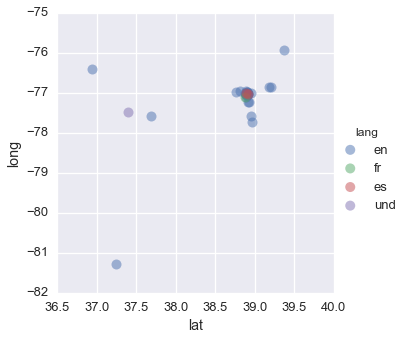

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_context("talk")
ax = sns.lmplot(x="lat", y="long", hue="lang", data=df, fit_reg=False, scatter_kws={"s": 100,"alpha":0.5})

In [32]:
count = 0

for l in linwood:
    if l['id'] == tweet[-1]['id']:
        break
    else:
        tweet.append(l)
        count += 1
    

In [46]:
max_id = linwood[0]['id']
max_id

701083267974299648

In [38]:
tweets = []

In [55]:
count = 0
test = []
linwood = t.statuses.user_timeline(screen_name="linwoodc3", count = 200, max_id = 701083267974299648)
while count < 16:
    for l in linwood:
        test.append(l)
    count +=1
    maxid = test[-1]['id']
    print count,+linwood[-1]['id'], maxid
    linwood = t.statuses.user_timeline(screen_name="linwoodc3", count = 200, max_id = maxid)
    if count > 3 and test[-1]['id']== linwood[-1]['id']:
        break

1 505770645238841344 505770645238841344
2 440987625541758976 440987625541758976
3 414082187177107456 414082187177107456
4 376366212533350400 376366212533350400
5 341270637538590720 341270637538590720
6 237182004666437633 237182004666437633
7 181519522518409216 181519522518409216
8 120194856248291328 120194856248291328
9 89108029009694720 89108029009694720
10 2552803996 2552803996
11 1274317112 1274317112


In [54]:
len(tweets)

2091

In [57]:
linwood

[{u'contributors': None,
  u'coordinates': None,
  u'created_at': u'Tue Mar 03 16:18:36 +0000 2009',
  u'entities': {u'hashtags': [],
   u'symbols': [],
   u'urls': [],
   u'user_mentions': []},
  u'favorite_count': 0,
  u'favorited': False,
  u'geo': None,
  u'id': 1274317112,
  u'id_str': u'1274317112',
  u'in_reply_to_screen_name': None,
  u'in_reply_to_status_id': None,
  u'in_reply_to_status_id_str': None,
  u'in_reply_to_user_id': None,
  u'in_reply_to_user_id_str': None,
  u'is_quote_status': False,
  u'lang': u'en',
  u'place': None,
  u'retweet_count': 0,
  u'retweeted': False,
  u'source': u'<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
  u'text': u'in class',
  u'truncated': False,
  u'user': {u'contributors_enabled': False,
   u'created_at': u'Tue Mar 03 16:16:58 +0000 2009',
   u'default_profile': False,
   u'default_profile_image': False,
   u'description': u'Value Investor, Entreprenuer, DIE HARD  CHIEFS fan!.',
   u'entities': {u'description': {u'

In [58]:
statuses = search_results['statuses']
status = tweets

NameError: name 'status' is not defined

In [64]:
status_texts = [ status['text'] 
                 for status in statuses ]

screen_names = [ user_mention['screen_name'] 
                 for status in statuses
                     for user_mention in status['entities']['user_mentions'] ]

hashtags = [ hashtag['text'] 
             for status in statuses
                 for hashtag in status['entities']['hashtags'] ]

# Compute a collection of all words from all tweets
words = [ w 
          for t in status_texts 
              for w in t.split() ]

# Explore the first 5 items for each...

print json.dumps(status_texts[0:5], indent=1)
print json.dumps(screen_names[0:5], indent=1) 
print json.dumps(hashtags[0:5], indent=1)
print json.dumps(words[0:5], indent=1)

[
 "@rdpeng Greetings Dr. Peng, Week 2 Quiz of Exploratory Data Analysis need update; Hadley moved 'movies' to 'ggplot2movies'; see his github", 
 "@hadleywickham @RadDad_17  Disregard, I found your update https://t.co/3mNtM5Pv2e; will help update Coursera course code for quiz.", 
 "@hadleywickham @RadDad_17 I guess movies was removed.  'movies' is the data set in questions 9-10 of Week 2 of Exploratory Data Analysis", 
 "Took a day off to work on assignments in the #datascience specialization  from @JohnsHopkins on @coursera.  #exploratorydataanalysis #class4", 
 "@sarahkaplan48 great article, small typo: \"he way a the fabric of trampoline would vibrate\" https://t.co/OvFOVlH72g"
]
[
 "rdpeng", 
 "hadleywickham", 
 "RadDad_17", 
 "hadleywickham", 
 "RadDad_17"
]
[
 "datascience", 
 "exploratorydataanalysis", 
 "class4", 
 "fiveguys", 
 "5guys"
]
[
 "@rdpeng", 
 "Greetings", 
 "Dr.", 
 "Peng,", 
 "Week"
]


In [85]:
from collections import Counter

for item in [new_words, screen_names, hashtags]:
    
    c = Counter(item)
    print c.most_common()[:50] # top 10
    print

[(u'@SlackerRadio', 451), (u'\u266b', 446), (u'I', 351), (u'\u2665', 305), (u'RT', 177), (u'station', 95), (u'Listening', 91), (u"I'm", 83), (u'The', 79), (u'just', 73), (u'video', 70), (u'like', 65), (u'@YouTube', 60), (u'This', 54), (u'people', 52), (u'Banned', 51), (u'-', 50), (u'liked', 47), (u'My', 42), (u'@TYLERR_DURDEN', 42), (u"don't", 42), (u'good', 41), (u'#pandora', 40), (u'Just', 36), (u'&amp;', 34), (u'...', 33), (u'"I', 32), (u'time', 30), (u'know', 29), (u'You', 28), (u'A', 27), (u"it's", 27), (u'It', 27), (u'@Shannon_Penn', 26), (u'How', 25), (u'burned', 25), (u'day', 25), (u'want', 23), (u'love', 23), (u'Is', 23), (u'got', 22), (u'If', 22), (u'need', 21), (u'u', 21), (u'2', 20), (u'That', 20), (u'@linwoodc3', 20), (u'Brown', 20), (u'new', 20), (u'What', 20)]

[(u'SlackerRadio', 453), (u'YouTube', 66), (u'TYLERR_DURDEN', 61), (u'Shannon_Penn', 37), (u'SiYue1', 28), (u'linwoodc3', 24), (u'ArrowheadPride', 23), (u'Codecademy', 23), (u'cnnbrk', 22), (u'prettyboy757', 22), 

In [68]:
from sklearn.feature_extraction import stop_words

In [70]:
len(stop_words.ENGLISH_STOP_WORDS),len(words)

(318, 27582)

In [83]:
new_words = []
for l in words:
    if l in stop_words.ENGLISH_STOP_WORDS:
        pass
    else:
        new_words.append(l)
print len(new_words)        

19523


In [ ]:
sorted(list(stop_words.ENGLISH_STOP_WORDS))

In [90]:

# A function for computing lexical diversity
def lexical_diversity(tokens):
    return 1.0*len(set(tokens))/len(tokens) 

# A function for computing the average number of words per tweet
def average_words(statuses):
    total_words = sum([ len(s.split()) for s in statuses ]) 
    return 1.0*total_words/len(statuses)

print lexical_diversity(new_words)
print lexical_diversity(screen_names)
print lexical_diversity(hashtags)
print average_words(status_texts)

0.517748296881
0.211348684211
0.68031496063
13.1908177905


In [111]:
from pymongo import MongoClient

In [112]:
client = MongoClient()

In [113]:
db = client.test_database

In [114]:
collection = db.test_collection

In [115]:
collection

Collection(Database(MongoClient('localhost', 27017), u'test_database'), u'test_collection')

In [116]:
import datetime
post = {"author": "Mike",
"text": "My first blog post!",
"tags": ["mongodb", "python", "pymongo"],
"date": datetime.datetime.utcnow()}

In [110]:
posts.insert_one(post).

{'_id': ObjectId('56ca96a28c827a842c23c01b'),
 'author': 'Mike',
 'date': datetime.datetime(2016, 2, 22, 5, 0, 42, 338938),
 'tags': ['mongodb', 'python', 'pymongo'],
 'text': 'My first blog post!'}

In [118]:
post_id = posts.insert_one(post).inserted_id
post_id

ObjectId('56ca98668c827a842c23c01c')

In [119]:
db.collection_names(include_system_collections=False)

[u'posts']

In [121]:
posts.find_one({"author":"Mike"})

{u'_id': ObjectId('56ca98668c827a842c23c01c'),
 u'author': u'Mike',
 u'date': datetime.datetime(2016, 2, 22, 5, 8, 38, 732000),
 u'tags': [u'mongodb', u'python', u'pymongo'],
 u'text': u'My first blog post!'}

In [122]:
new_posts = [{"author": "Mike",
...               "text": "Another post!",
...               "tags": ["bulk", "insert"],
...               "date": datetime.datetime(2009, 11, 12, 11, 14)},
...              {"author": "Eliot",
...               "title": "MongoDB is fun",
...               "text": "and pretty easy too!",
...               "date": datetime.datetime(2009, 11, 10, 10, 45)}]

In [123]:
result = posts.insert_many(new_posts)
import re

In [147]:
for post in posts.find({"text":{'$regex':'(first)'}}):
    print post

{u'date': datetime.datetime(2016, 2, 22, 5, 8, 38, 732000), u'text': u'My first blog post!', u'_id': ObjectId('56ca98668c827a842c23c01c'), u'author': u'Mike', u'tags': [u'mongodb', u'python', u'pymongo']}


In [134]:
posts.find({'author':"Mike"})

{u'_id': ObjectId('56ca98668c827a842c23c01c'),
 u'author': u'Mike',
 u'date': datetime.datetime(2016, 2, 22, 5, 8, 38, 732000),
 u'tags': [u'mongodb', u'python', u'pymongo'],
 u'text': u'My first blog post!'}

In [131]:
posts.count()

3